# Mission- 
Implementation of Machine Learning Classification Models for prediction of fraudulent credit card transactions using Anonymized credit card transaction data as trainig dataset (labeled as fraudulent or genuine)

# About Dataset- 
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.------

# Steps- 
---
     1) A CLOSER LOOK AT DATA
         1.1) Import libraries & Load training data into pandas dataframe
         1.2) Visualizations
         1.3) Findings
         
     2) Data Preprocessing
         2.1) Feature Scaling
         2.2) Create a reserved(test) dataset
         2.3) Curing Unbalaced data using SMOTE(Oversampling)
         
     3) Selecting the right performace metric(Recall)
     
     4) Machine Learning Models
         4.1) Logistic Regression 
             4.1.1) performace evaluation (Oversampled Random Data)
             4.1.2) performace evaluation (Complete Skewed Dataset)
             4.1.3) performace evaluation (Reserved dataset)
             4.1.4) precision-recall tradoff (changing threshold)
             
         4.2) Random Forest
             4.2.1) performace evaluation (Oversampled Random Data)
             4.2.2) performace evaluation (Complete Skewed Dataset)
             4.2.3) performace evaluation (Reserved dataset)
             4.2.4) precision-recall tradoff (changing threshold)
             
         4.3) Support Vector Machine
             4.3.1) performace evaluation (Oversampled Random Data)
             4.3.2) performace evaluation (Complete Skewed Dataset)
             4.3.3) performace evaluation (Reserved dataset)
             4.3.4) precision-recall tradoff (changing threshold)
             
         4.4) KNN
             4.4.1) performace evaluation (Oversampled Random Data)
             4.4.2) performace evaluation (Complete Skewed Dataset)
             4.4.3) performace evaluation (Reserved dataset)
             4.4.4) precision-recall tradoff (changing threshold)
---      
          

# 1) A CLOSER LOOK AT DATA
##   1.1) Import libraries & Load training data into pandas dataframe

In [1]:
#importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline

In [2]:
train_data = pd.read_csv("creditcard.csv")
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

we have training dataset with 284807 rows & 30 features & 1 target variable 'Class' (0 or 1 , zero means normal transaction & 1 means fradulent).
due to data privacy 28 of the features are anonymous so they will not be useful during data visualization but we have 2 name features 'Time' (It contains the seconds elapsed between each transaction and the first transaction in the dataset) and 'Amount'(amount of transaction). Lets plot some graphs-

## 1.2) Visualizations

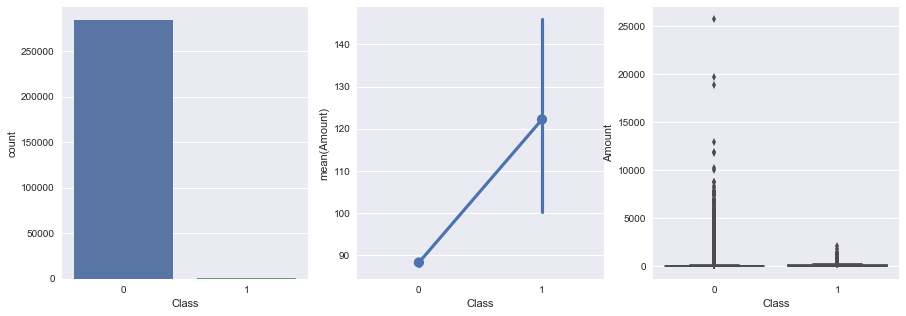

In [3]:
# Lets Plot some graphs & have an visual understanding about our dataset
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(train_data['Class'],ax=ax1)
sns.factorplot(x='Class',y='Amount',data=train_data,ax=ax2)
sns.boxplot(train_data['Class'],train_data['Amount'],ax=ax3)
plt.close(2)

In [4]:
print("Percentage of data classfied as fradulent transaction: ",len(train_data[train_data['Class']==1])/len(train_data))
print("Percentage of data classfied as normal transaction",len(train_data[train_data['Class']==0])/len(train_data))

Percentage of data classfied as fradulent transaction:  0.001727485630620034
Percentage of data classfied as normal transaction 0.9982725143693799


---
as we can see from above output & countplot that our data is highly skewed. 99.8% of dataset belongs to class '0' & only 0.0017 to class '1'. This indicates that we cannot use "Accuracy" as metric because even if our model classfies everything as class 0 we will have accuracy of almost 99% but model will be useless. 

we can see in the factor plot that mean Amount of transaction for fradulent transactions in higher than normal transactions.

From box plot we can see that for normal transactions , number of outliers is high but we have less outliers in boxplot for fradulent transactions (This might indicate that fraudsters are neither going form very high amount nor low amount since mean amount for class 1 is higher than class 0)

---

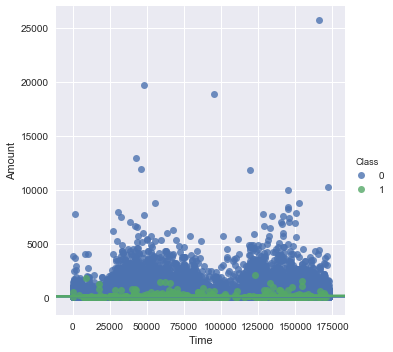

In [5]:
# plot for viewing trasactions with respect to amount & time
sns.lmplot(x='Time',y='Amount',hue='Class',data=train_data,size=5)

---
In above graph we plotted Amount on y-axis & Time on x-axis , green dots for class 1 transactions & blue dots for class 0 transactions. Since our data is highly unbalaced we can not come up with any singnificant intuition with this plot. but this plot might be useful when we redraw it after making our data balanced using'oversampling'.

---

# 2) Data Preprocessing
##   2.1) Feature Scaling

Amount & Time both features contains high values as compare to other anonymous features so we need scale them. usually some of the models in sklearn have inbuilt scaling but it's not much of work so lets do it

In [6]:
from sklearn.preprocessing import StandardScaler
train_data['Amount'] = StandardScaler().fit_transform(train_data['Amount'].values.reshape(-1,1))
train_data['Time'] = StandardScaler().fit_transform(train_data['Time'].values.reshape(-1,1))
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## 2.2) Create a reserved(test) dataset
We are creating this separate dataset because we want to keep this data untouched(not involved in oversampling, training & validation(becasue we are going to pick random validations sets in each iteration & then in each iteration model will be trained on remaining training set & we want to keep reserved dataset as dataset which our model has never encountered)

In [7]:
#first store our features into numpy arrays
X_all=train_data.iloc[:,range(30)].values
y_all=train_data['Class'].values

# Lets create a reserved test set from original skewed data set. we will no use this set for oversampling or in training .
# This set will be kept safe to validated the performance of model.
from sklearn.model_selection import train_test_split
X_train,X_Reserv,y_train,y_Reserv = train_test_split(X_all,y_all,test_size=0.25)

#how data looks without oversampling in training set
print("Class '1' in target variable y without over-sampling:",len(y_train[y_train==1]))
print("Class '0' in target variable y without over-sampling:",len(y_train[y_train==0]))
print("Length of input X in training set(not-oversampled): ",len(X_train))

#how data looks in reserved set
print('----------------------------------------------------------------------------------')
print("Class '1' in target variable y in Reserved set:",len(y_Reserv[y_Reserv==1]))
print("Class '0' in target variable y in Reserved set:",len(y_Reserv[y_Reserv==0]))
print("Length of input X in Reserved set: ",len(X_Reserv))

Class '1' in target variable y without over-sampling: 366
Class '0' in target variable y without over-sampling: 213239
Length of input X in training set(not-oversampled):  213605
----------------------------------------------------------------------------------
Class '1' in target variable y in Reserved set: 126
Class '0' in target variable y in Reserved set: 71076
Length of input X in Reserved set:  71202


## 2.3) Curing Unbalaced data using SMOTE(Oversampling)
we can use undersampling or oversampling methods to get our data balanced.
Right now we will be implementing oversampling using SMOTE- It is a approach in which the minority class is over-sampled by creating synthetic examples. The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors.

In [8]:
#applying SMOTE
from imblearn.over_sampling import SMOTE
X_OverSam,y_OverSam=SMOTE().fit_sample(X_train,y_train)

#Lets see how our data looks after oversampling
print("Class '1' in target variable y without over-sampling:",len(y_OverSam[y_OverSam==1]))
print("Class '0' in target variable y without over-sampling:",len(y_OverSam[y_OverSam==0]))
print("Length of input X: ",len(X_OverSam))

Class '1' in target variable y without over-sampling: 213239
Class '0' in target variable y without over-sampling: 213239
Length of input X:  426478


As shown in above output additional data points created for class '1' & now our dataset contains both classes in equal ratio. 

---


# 3) Selecting the right performace metric(Recall)

we already know that we can not use Accuracy as a metric on imbalanced data but although now our dataset is balanced we would still prefer to use other metrics such as Precision/Recall/FScore because we are more interested in correctly predicting all class '1'(Fraud) transactions rather than class '0'. 

We can explain our choice of perfomace metric(Recall) using confusion metrix:
In a confusion matix we have 4 Values- 
TP= True Positives (Number of Correct predictions of class '1' transactions)
FP= False Positives (Number of wrong predictions where we have predicted   class'0'(normal) as class '1'(fraud))
TN= True Negative (Number of Correct predictions of class '0' transactions)
FN= False Positives (Number of wrong predictions where we have predicted class'1'(Fraud) as class '0'(Normal)) 

Below are the formulas for difference performance metrics:

Accuracy= (TP+TN)/(TP+TN+FP+FN) "out of all predictions how many we predicted right!! "

Precision= (TP/(TP+FP) "This gives us an intuition about how much waste we have created , by waste i mean the class'0' transaction which we wrongly predicted  as class'1' thus creating extra work for bank to follow up & analyze on these normal transactions which is not required"

Recall= (TP/(TP+FN) "This gives us an intuition about how much important stuff we have missed!! , by Important i mean the class'1' transactions which we wrongly predicted  as class'0'. It gives us information about how many fraud!! transactions we have missed"

F1score= This score is harmonic mean of Precision & Recall. . it ranges between 0 & 1 , 0 means worst & 1 means the best.

---
which metric we are interested in - Answer is "Recall" because we want to reduce number of "False Negatives"(predicting fraud transactions as normal) as much as possible. Reducing False Negatives means increasing the "Recall" so Recall is the metric we are interested. 

There is a tradoff between Precision & Recall if Recall increases - Precision will decrease & vice versa. so we need to find a perfect balance between precision & recall although i would be more inclined toward increasing Recall score because i don't want to leave any fraud transaction just for worry  predicting some normal transactions as class '1' (False Positves)

---
                                       

# 4) Machine Learning Models
##     4.1) Logistic Regression 

In [9]:
# applying logistic regression on different samples of oversampled data & storing values precision
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
Penalty=[0.01,0.05,0.1,1,10]
for p in Penalty:
    Recall=[]
    for k in range(5):
    #Picking random samples & Keeping 20% of data as validation set to measure Recall in each iteration
        X_OS_train,X_OS_val,y_OS_train,y_OS_val=train_test_split(X_OverSam,y_OverSam,test_size=0.20)
        lr=LogisticRegression(C=p)
        lr.fit(X_OS_train,y_OS_train)
        y_pred=lr.predict(X_OS_val)
        Recall.append(recall_score(y_OS_val,y_pred))
    print("Mean Recall for penalty=",p,"is",np.mean(Recall))

Mean Recall for penalty= 0.01 is 0.911300120886
Mean Recall for penalty= 0.05 is 0.912203364914
Mean Recall for penalty= 0.1 is 0.911317048884
Mean Recall for penalty= 1 is 0.912768005314
Mean Recall for penalty= 10 is 0.912334598534


### 4.1.1) Performace evaluation (Oversampled Random Data)

Logistic Regression's Recall values is approximatly 91% for any value of C that we have chosen. Lets see how  our model which is fitted on oversampled data performs on original skewed data.

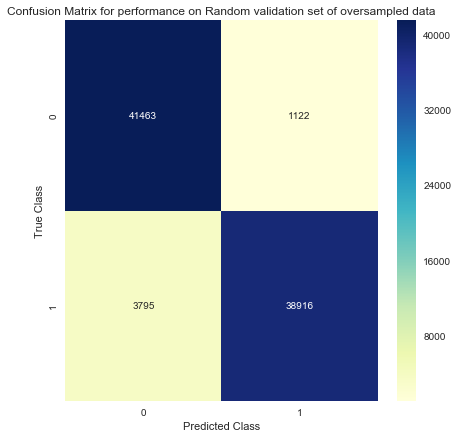

In [10]:
df_cm = pd.DataFrame(confusion_matrix(y_OS_val,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix for performance on Random validation set of oversampled data")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")

We have achieved Recall value of approximately 89% on random validations sets of our oversampled input data.
from above confusion matrix we can see that we are missing 3795 fraud transactions out of total 42711 fraud transactions.We need to imporved this!!(May be on the cost of Precision)

### 4.1.2) Performace evaluation (Complete Skewed Dataset)
In this step we will applying our trained(oversampled data) LR model to predict the values for original skewed dataset

Recall: 0.916666666667
Precision: 0.0572553002412


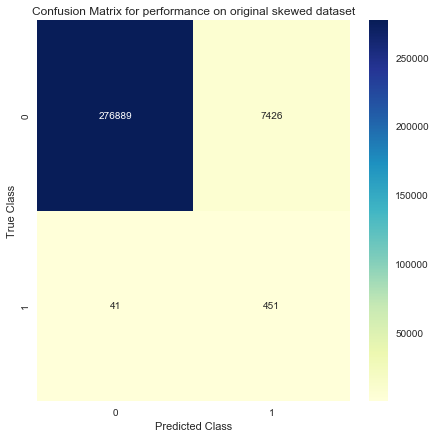

In [11]:
# predicting values for the complete skewed data set
y_pred = lr.predict(X_all)
df_cm = pd.DataFrame(confusion_matrix(y_all,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix for performance on original skewed dataset")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
print("Recall:",recall_score(y_all,y_pred))
print("Precision:",precision_score(y_all,y_pred))

# On complete skewed dataset we got Recall of 92% , in other words we are classifing 38 transactions wrongly out of total 451 fraud transactions. and producing waste of 7426 normal transactions classified as fradulent.

### 4.1.3) performace evaluation (Reserved dataset)
In this step we will applying our trained(oversampled data) LR model to predict the values for Reserved Dataset (not involved in oversampling, training & validation.

Recall: 0.936507936508
Precision: 0.0606060606061


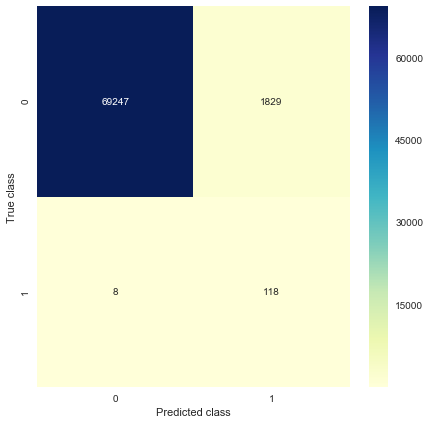

In [12]:
# predicting values for the Reserved data set
y_pred = lr.predict(X_Reserv)
df_cm = pd.DataFrame(confusion_matrix(y_Reserv,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Recall:",recall_score(y_Reserv,y_pred))
print("Precision:",precision_score(y_Reserv,y_pred))

From above confusion matrix we can see that our model is missing 8 fradulent transaction out of 118.

#With Logistic Regression we achieved 93% Recall on overall skewed dataset & almost same on Reserved set. This i would say quite good becasue Reserved data set was neither used during the oversampling nor during training, it was completely unknown.

---

### 4.1.4) precision-recall tradoff (changing threshold)
by default the threshold for logistic regression is 0.5,Let's see if different thresholds can increase our Recall further while not compromising with Precision score so much!!

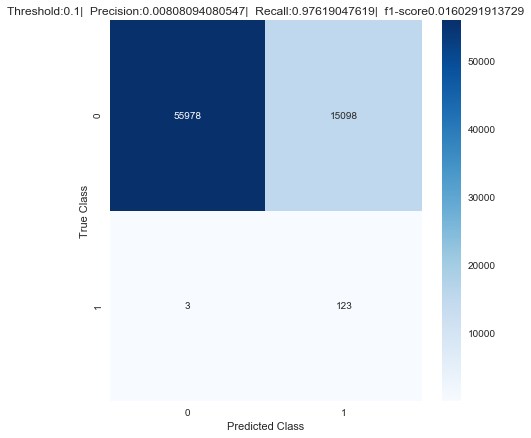

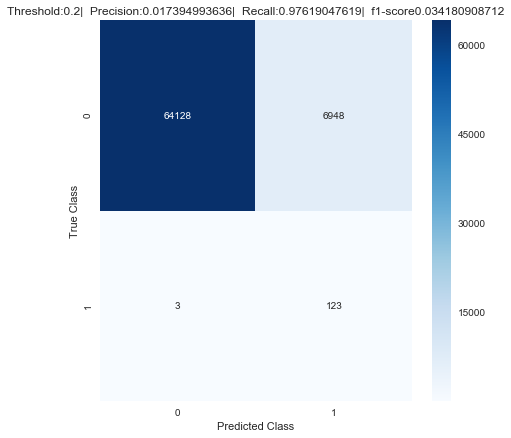

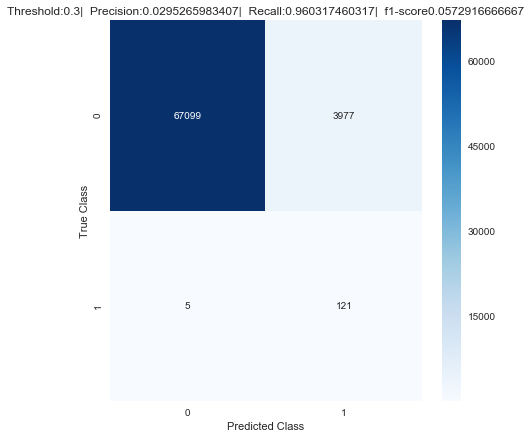

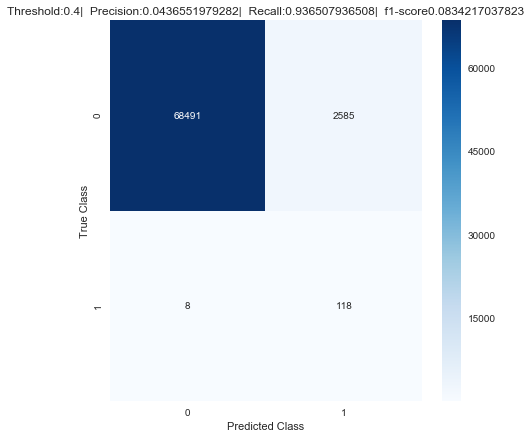

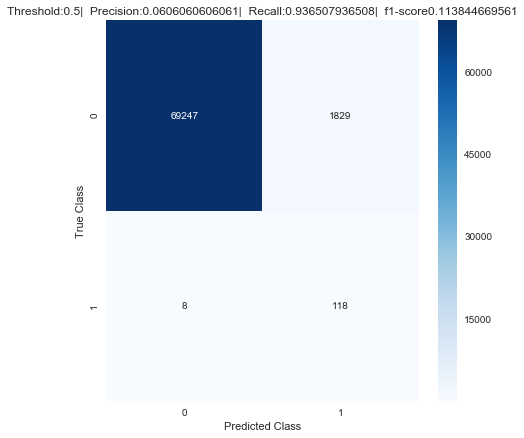

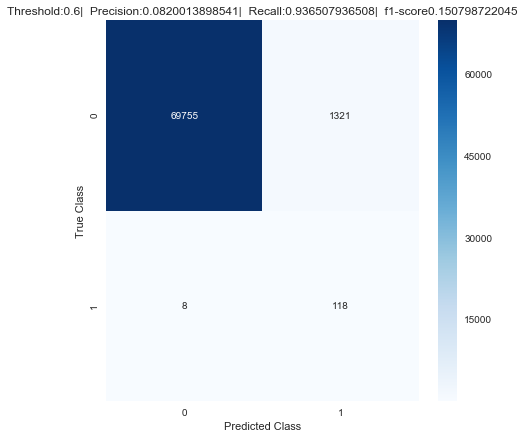

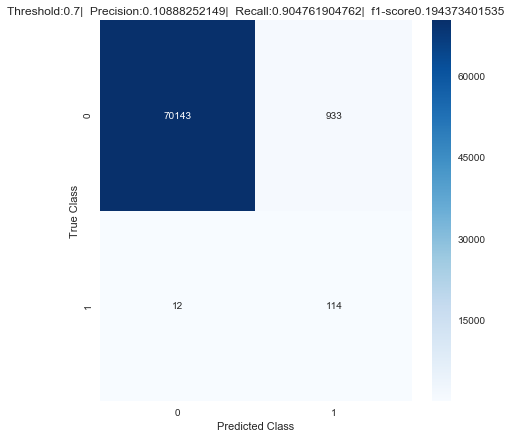

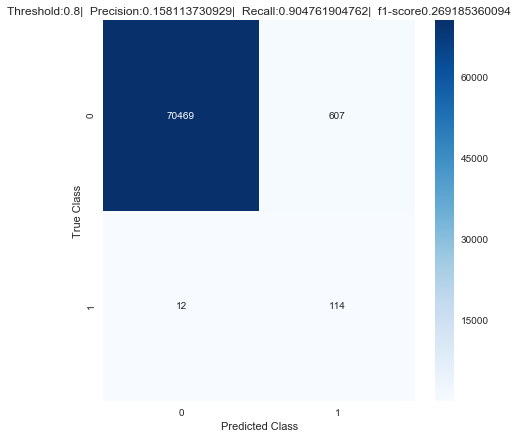

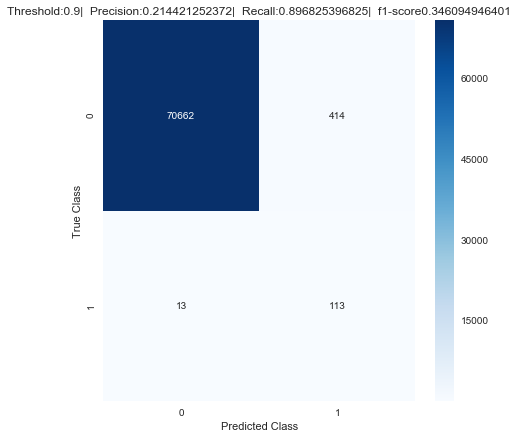

In [13]:
#list of thresholds
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for th in thresholds:
    y_prob=lr.predict_proba(X_Reserv)
    y_prob_1=y_prob[:,1]
    y_thr=[]
    #updating the predicted target as per new threhold
    for pb in y_prob_1:
        if pb>th:
            y_thr.append(1)
        else:
            y_thr.append(0)
    df_cm = pd.DataFrame(confusion_matrix(y_Reserv,y_thr),index = [0,1],columns = [0,1])
    plt.figure(figsize = (7,7))
    precision = str(precision_score(y_Reserv,y_thr))
    recall = str(recall_score(y_Reserv,y_thr))
    fscore = str(f1_score(y_Reserv,y_thr))
    title = str("Threshold:"+str(th)+"|  Precision:"+precision+"|  Recall:"+recall+"|  f1-score"+fscore)
    plt.title(title)
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='d')
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")

as we can see in above graph that there is a trade-off between precison & recall , high recall values leads to categorization of class 0 transactions as class 1(low precision). Now we have to make the decision! how much we are going to compromise with recall in order get a high precision.

### plotting P-R curve for better understanding of model performace with respected to thresholds

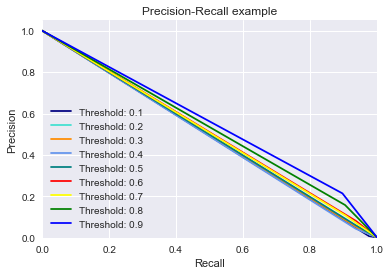

In [14]:
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import auc

y_prob=lr.predict_proba(X_Reserv)
y_prob_1=y_prob[:,1]

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])
for th,c in zip(thresholds,colors):

    y_thr = y_prob_1 > th
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds= precision_recall_curve(y_Reserv, y_thr)

   
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=c,
                 label='Threshold: %s'%th)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

## 4.2) Random Forest

In [15]:
# applying logistic regression on different samples of oversampled data & storing values precision
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
est=[1,2,3,4,5]
for p in est:
    Recall=[]
    for k in range(5):
    #Picking random samples & Keeping 20% of data as validation set to measure Recall in each iteration
        X_OS_train,X_OS_val,y_OS_train,y_OS_val=train_test_split(X_OverSam,y_OverSam,test_size=0.20)
        rf=RandomForestClassifier(n_estimators=p)
        rf.fit(X_OS_train,y_OS_train)
        y_pred=rf.predict(X_OS_val)
        Recall.append(recall_score(y_OS_val,y_pred))
    print("Mean Recall for estimators =",p,"is",np.mean(Recall))

Mean Recall for estimators = 1 is 0.997793850812
Mean Recall for estimators = 2 is 0.996540480628
Mean Recall for estimators = 3 is 0.999770262116
Mean Recall for estimators = 4 is 0.99955414751
Mean Recall for estimators = 5 is 0.999920269931


### 4.2.1) performace evaluation (Oversampled Random Data)
4.2.1) performace evaluation (Oversampled Random Data)

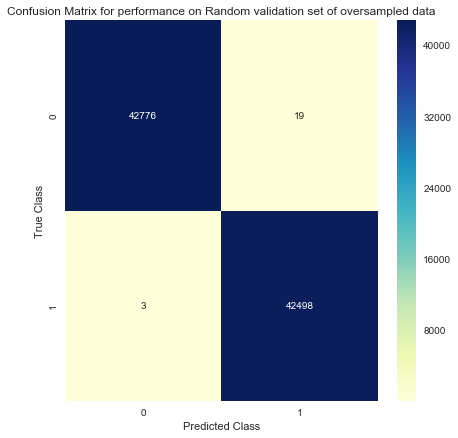

In [16]:
df_cm = pd.DataFrame(confusion_matrix(y_OS_val,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix for performance on Random validation set of oversampled data")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")

### 4.2.2) performace evaluation (Complete Skewed Data)
In this step we will applying our trained(oversampled data) RF model to predict the values for original skewed dataset

Recall: 0.94918699187
Precision: 0.89292543021


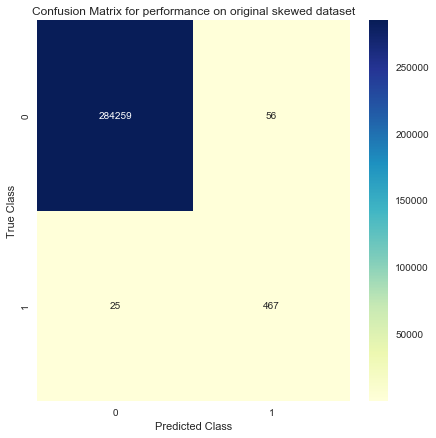

In [17]:
# predicting values for the complete skewed data set
y_pred = rf.predict(X_all)
df_cm = pd.DataFrame(confusion_matrix(y_all,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix for performance on original skewed dataset")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
print("Recall:",recall_score(y_all,y_pred))
print("Precision:",precision_score(y_all,y_pred))

### 4.2.3) performace evaluation (Reserved dataset)
In this step we will applying our trained(oversampled data) RF model to predict the values for Reserved Dataset (not involved in oversampling, training & validation.

Recall: 0.801587301587
Precision: 0.7890625


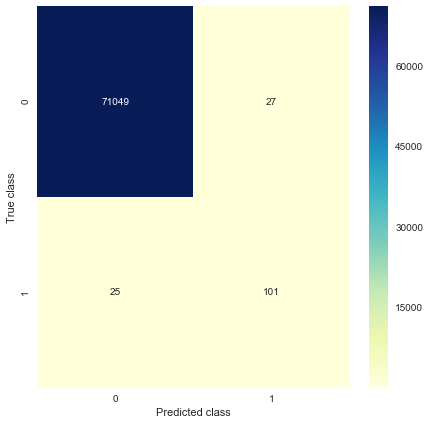

In [18]:
# predicting values for the Reserved data set
y_pred = rf.predict(X_Reserv)
df_cm = pd.DataFrame(confusion_matrix(y_Reserv,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Recall:",recall_score(y_Reserv,y_pred))
print("Precision:",precision_score(y_Reserv,y_pred))

### 4.2.4) precision-recall tradoff (changing threshold)¶
Let's see if different thresholds can increase our Recall further while not compromising with Precision score so much!!

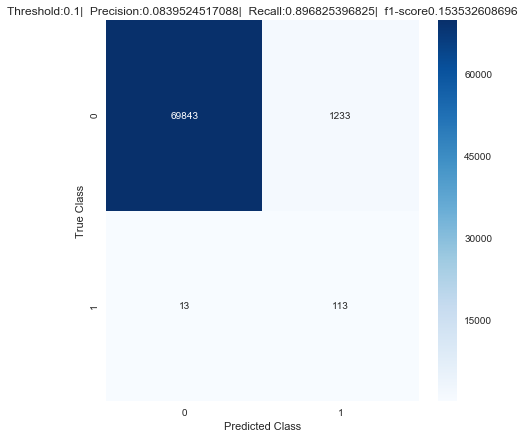

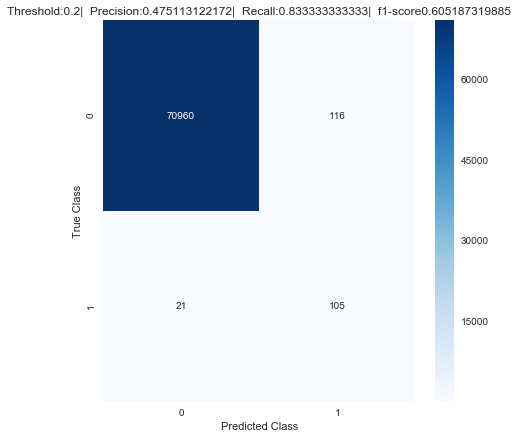

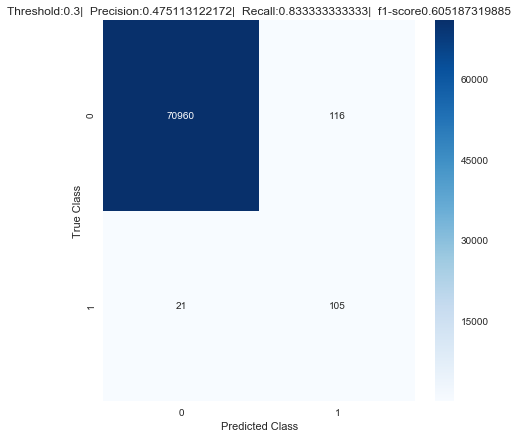

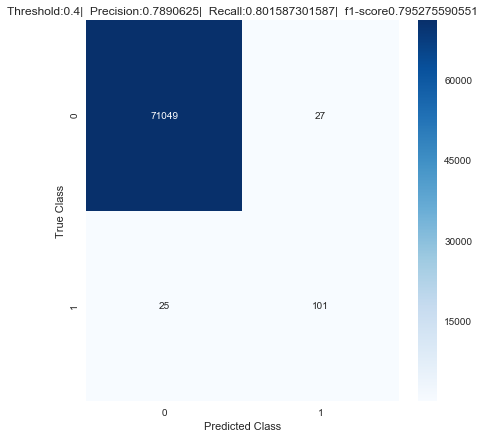

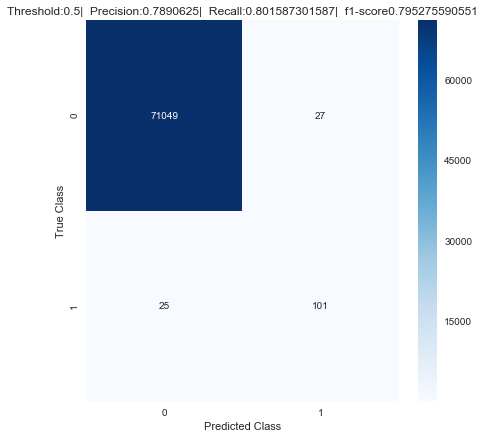

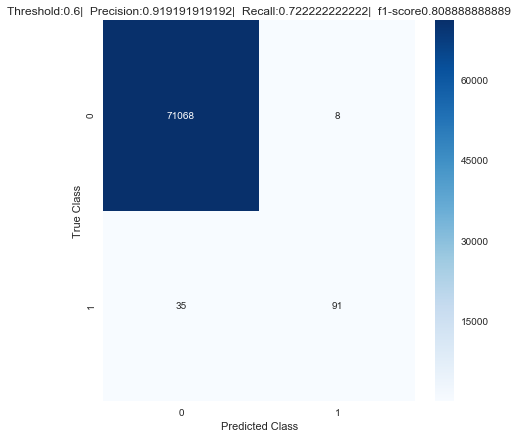

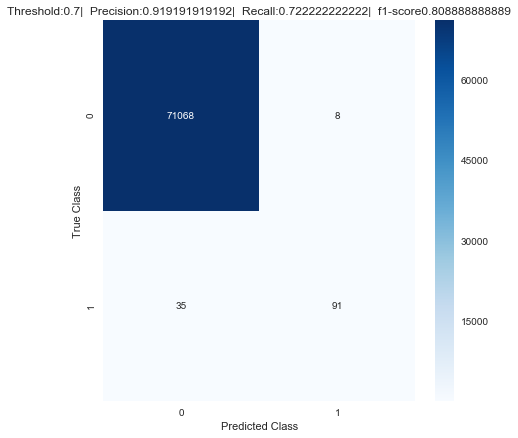

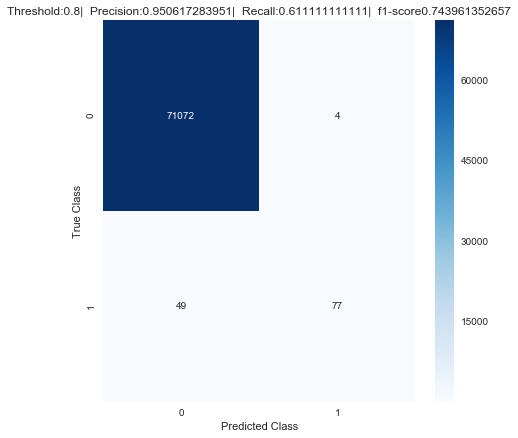

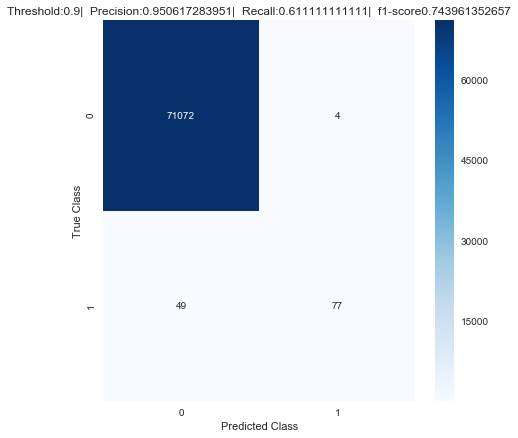

In [19]:
#list of thresholds
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for th in thresholds:
    y_prob=rf.predict_proba(X_Reserv)
    y_prob_1=y_prob[:,1]
    y_thr=[]
    #updating the predicted target as per new threhold
    for pb in y_prob_1:
        if pb>th:
            y_thr.append(1)
        else:
            y_thr.append(0)
    df_cm = pd.DataFrame(confusion_matrix(y_Reserv,y_thr),index = [0,1],columns = [0,1])
    plt.figure(figsize = (7,7))
    precision = str(precision_score(y_Reserv,y_thr))
    recall = str(recall_score(y_Reserv,y_thr))
    fscore = str(f1_score(y_Reserv,y_thr))
    title = str("Threshold:"+str(th)+"|  Precision:"+precision+"|  Recall:"+recall+"|  f1-score"+fscore)
    plt.title(title)
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='d')
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")

### plotting P-R curve for better understanding of model performace with respected to thresholds


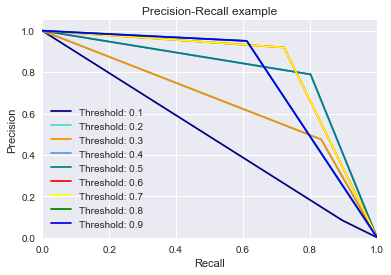

In [20]:
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import auc

y_prob=rf.predict_proba(X_Reserv)
y_prob_1=y_prob[:,1]

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])
for th,c in zip(thresholds,colors):

    y_thr = y_prob_1 > th
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds= precision_recall_curve(y_Reserv, y_thr)

   
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=c,
                 label='Threshold: %s'%th)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

## 4.3) Support Vector Machine
### SVM was taking a huge time to converge so i had to comment SVM code.(will try in future with better machine)

In [21]:
# applying SVM on different samples of oversampled data & storing values precision
#from sklearn.svm import SVC
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
#C=[0.1,0.5,1,2,4,5]
#for p in C:
#    Recall=[]
#    for k in range(5):
    #Picking random samples & Keeping 20% of data as validation set to measure Recall in each iteration
#        X_OS_train,X_OS_val,y_OS_train,y_OS_val=train_test_split(X_OverSam,y_OverSam,test_size=0.20)
#        sv=SVC(C=p)
#        sv.fit(X_OS_train,y_OS_train)
#        y_pred=sv.predict(X_OS_val)
#        Recall.append(recall_score(y_OS_val,y_pred))
#    print("Mean Recall for penalty =",p,"is",np.mean(Recall))

## 4.4) KNN

In [22]:
# applying logistic regression on different samples of oversampled data & storing values precision
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
neighbors=[1,3,5,8,12,20]
for p in neighbors:
    Recall=[]
    for k in range(5):
    #Picking random samples & Keeping 20% of data as validation set to measure Recall in each iteration
        X_OS_train,X_OS_val,y_OS_train,y_OS_val=train_test_split(X_OverSam,y_OverSam,test_size=0.20)
        knn=KNeighborsClassifier(n_neighbors=p)
        knn.fit(X_OS_train,y_OS_train)
        y_pred=rf.predict(X_OS_val)
        Recall.append(recall_score(y_OS_val,y_pred))
    print("Mean Recall for estimators =",p,"is",np.mean(Recall))

Mean Recall for estimators = 1 is 0.99999528702
Mean Recall for estimators = 3 is 0.999971798648
Mean Recall for estimators = 5 is 0.999995317366
Mean Recall for estimators = 8 is 0.999985958034
Mean Recall for estimators = 12 is 0.999985920456
Mean Recall for estimators = 20 is 0.999995309128


### 4.4.1) performace evaluation (Oversampled Random Data)

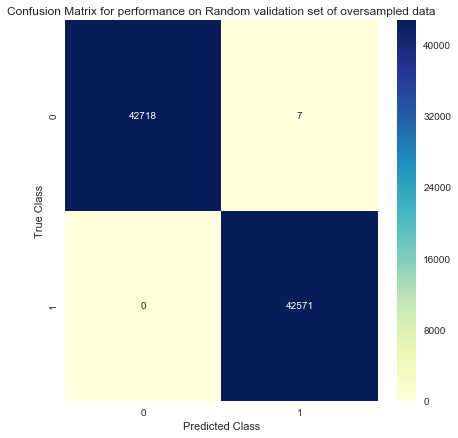

In [23]:
df_cm = pd.DataFrame(confusion_matrix(y_OS_val,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix for performance on Random validation set of oversampled data")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")

Awesome!! recall is 99.99% & precision is also almost 1 because we have misclassfied only 7 samples of class 0.
this could be a good news but wait for the results of applying this model to skewed & reserved datasets.

### 4.4.2) performace evaluation (Complete Skewed Data)

Recall: 0.973577235772
Precision: 0.227014218009


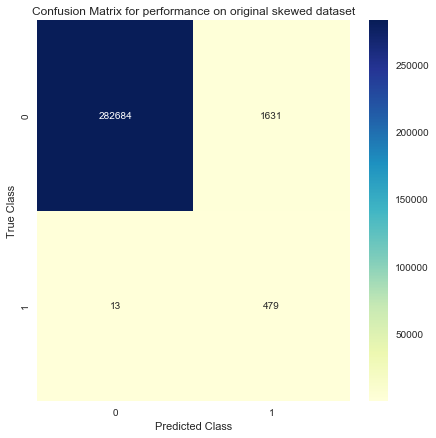

In [24]:
# predicting values for the complete skewed data set
y_pred = knn.predict(X_all)
df_cm = pd.DataFrame(confusion_matrix(y_all,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix for performance on original skewed dataset")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
print("Recall:",recall_score(y_all,y_pred))
print("Precision:",precision_score(y_all,y_pred))

on overall skewed data set we got recall of 97% which i consider as good , we are only misclassifing 13 samples of class1 out of total 492 samples.

### 4.4.3) performace evaluation (Reserved Datset)

Recall: 0.896825396825
Precision: 0.213610586011


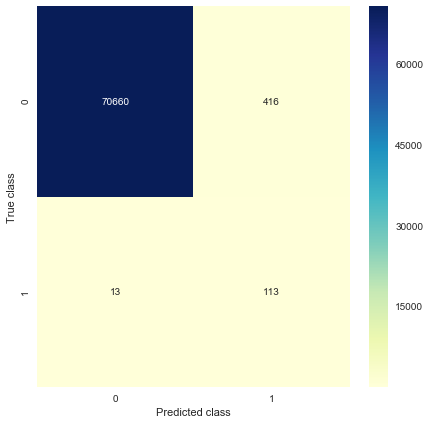

In [25]:
# predicting values for the Reserved data set
y_pred = knn.predict(X_Reserv)
df_cm = pd.DataFrame(confusion_matrix(y_Reserv,y_pred),index = [0,1],columns = [0,1])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm,annot=True,cmap='YlGnBu', fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')
print("Recall:",recall_score(y_Reserv,y_pred))
print("Precision:",precision_score(y_Reserv,y_pred))

We achieved 90% of recall on reserved data set with better precision as compare to other models while prediction on reserved dataset

### 4.2.4) precision-recall tradoff (changing threshold)¶
Let's see if different thresholds can increase our Recall further while not compromising with Precision score so much!!


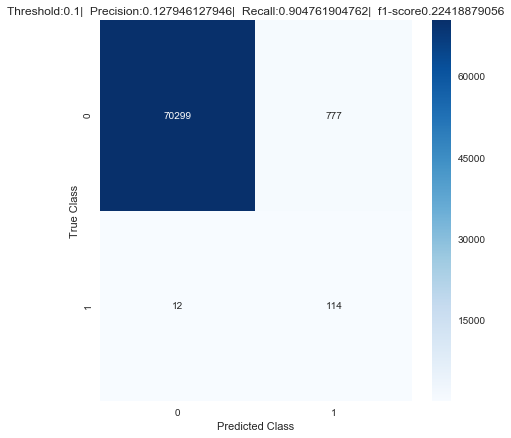

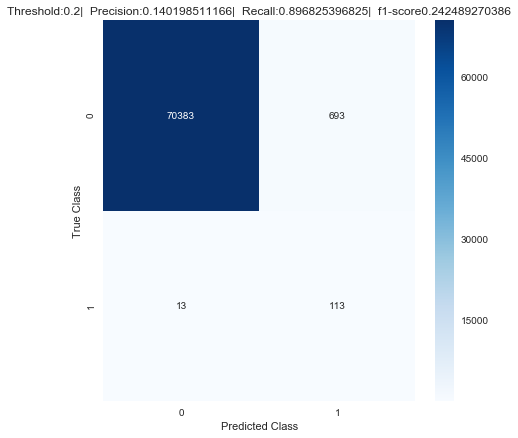

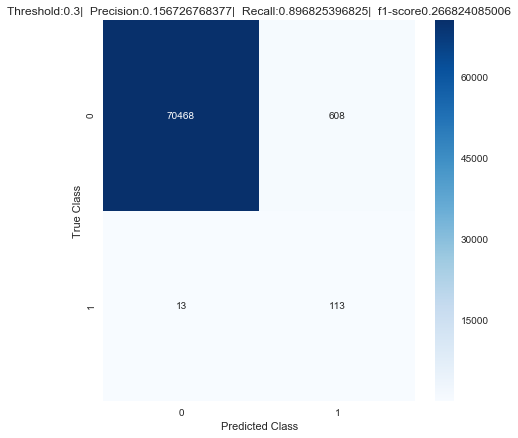

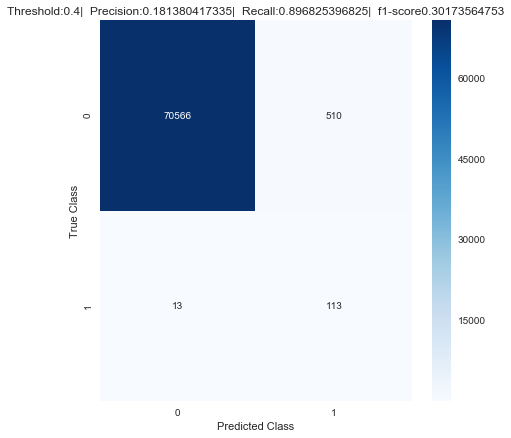

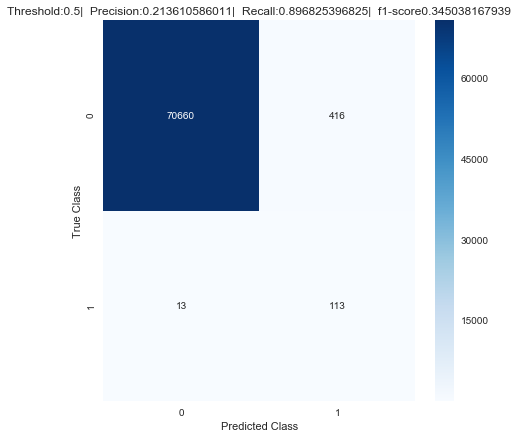

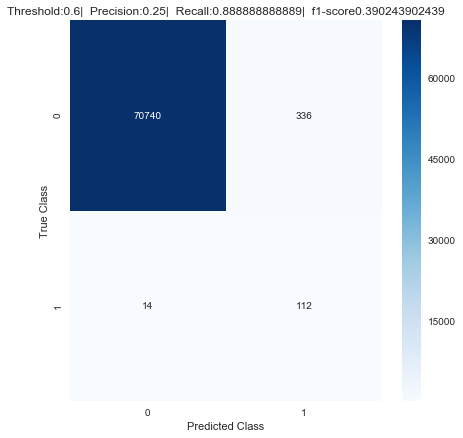

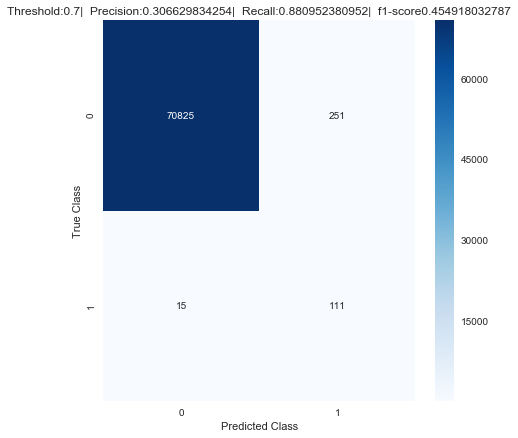

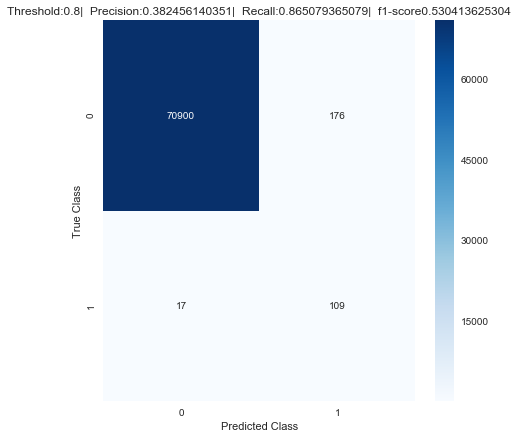

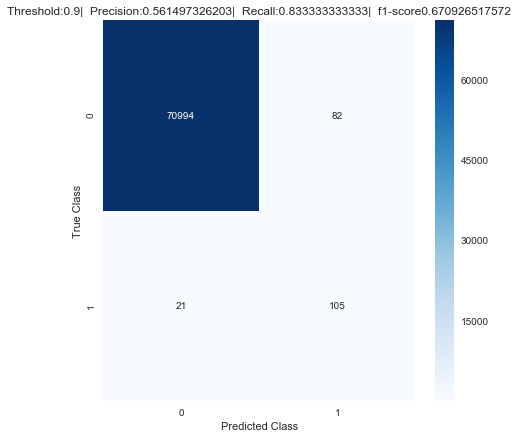

In [26]:
#list of thresholds
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for th in thresholds:
    y_prob=knn.predict_proba(X_Reserv)
    y_prob_1=y_prob[:,1]
    y_thr=[]
    #updating the predicted target as per new threhold
    for pb in y_prob_1:
        if pb>th:
            y_thr.append(1)
        else:
            y_thr.append(0)
    df_cm = pd.DataFrame(confusion_matrix(y_Reserv,y_thr),index = [0,1],columns = [0,1])
    plt.figure(figsize = (7,7))
    precision = str(precision_score(y_Reserv,y_thr))
    recall = str(recall_score(y_Reserv,y_thr))
    fscore = str(f1_score(y_Reserv,y_thr))
    title = str("Threshold:"+str(th)+"|  Precision:"+precision+"|  Recall:"+recall+"|  f1-score"+fscore)
    plt.title(title)
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='d')
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")

### plotting P-R curve for better understanding of model performace with respected to thresholds

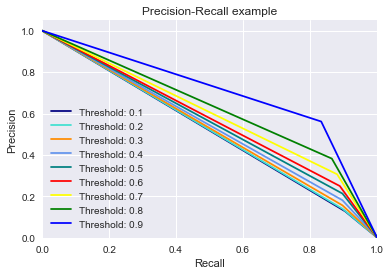

In [29]:
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.metrics import auc

y_prob=knn.predict_proba(X_Reserv)
y_prob_1=y_prob[:,1]

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])
for th,c in zip(thresholds,colors):

    y_thr = y_prob_1 > th
    # Compute Precision-Recall and plot curve
    precision, recall, thresholds= precision_recall_curve(y_Reserv, y_thr)

   
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=c,
                 label='Threshold: %s'%th)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

# We have tried logistic Regression, Random Forest & KNN algorithms. all three models shown different behaviours on different type of test sets(set from oversampled data, complete skewed data & Reserved data) & different thresholds. 
### For me performance on Reserved data is more important than the others. From my analysis of PR curves and confusion matrix: 
### Logistic Regression - Good Recall - Bad Precision<br>
### Random Forest - Good Recall-Good Precision<br>
### KNN- fair recall - fair precision

### we need to discuss these model performaces (reserved dataset with different thresholds) with credit card company & show them the precision recall tradoff and can come up the conclusion that which model company would prefer. 
